In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import scipy.stats as st
import missingno as msno
from quilt.data.ResidentMario import missingno_data
import math
%store -r d_04

In [2]:
%store -r d_04

In [3]:
def mEmptyCell(data):
    all_empty_cell = round((sum(data.isnull().sum()))*100/(len(data)*len(data.columns)))
    return all_empty_cell 

In [4]:
print ('mEmptyCell --- A -----', mEmptyCell(d_04))

mEmptyCell --- A ----- 0


In [5]:
d_04

,Code,Nom_du_produit,Marque,Categories,Calorie_Kcal,Energie_J,Graisses,Graisses_saturés,Glucides,Sucres,Proteines,Sel,Sodium,Score,Fibres
21,0000000001281,Tarte noix de coco,"Crous Resto',Crous","Pies,Sweet pies,Coconut pies",381,1594,22,15.5,27.3,21.9,4.6,0.1,0.04,14,4.4
31,0000000001885,Compote de poire,Crous,"Plant-based foods and beverages,Plant-based fo...",157,657,0,0,36,27,0.6,0,0,-2,3.6
66,0000000005470,BAguette bressan,Crousresto',"Plant-based foods and beverages,Plant-based fo...",160,669,2.2,0.5,25.2,0.6,9.5,0.358,0.1432,-4,1.6
384,0000005016,Pesto à La Roquette Bio Kazidomi,Kazidomi,"Groceries,Sauces,Pestos",561,2318,53.2,9.6,11.7,0.5,8.2,2.7,1.08,23,1.3
385,0000005018,Crème d'Artichaut Bio Kazidomi,Kazidomi,"Spreads,Salted spreads,Artichoke spreads",268,1104,27.4,3.9,1.8,0,1.9,2.7,1.08,11,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555145,990530101017343401,Barre bio,Good Gout,"Plant-based foods and beverages,Plant-based fo...",509,2130,32.1,2.8,37.8,29.2,14,0.1,0.04,9,6.4
1555172,990530101029435828,Bio cookies,Griesson,"Snacks,Sweet snacks,Biscuits and cakes,Biscuit...",477,1996,20,8.4,66,33,6.6,0.6,0.24,19,3.3
1555265,9938809161503,"Jus de fruit Innocent pomme ,peche et poire",Innocent,fr:jus-de-pomme-poire,45,188,0.1,0.1,9.9,9.3,0.4,0.01,0.004,1,1.2
1555307,9950014911001,Oignons jaunes 40/60,Ferme De L'artois,"Plant-based foods and beverages,Plant-based fo...",0,0,5,5,2,0.5,32,0.2,0.08,-11,25


In [6]:
#Test Magasin


d_Br = d_04[['Marque','Score']]
print('shape A ', d_Br.shape)
d_Br['new'] = d_Br.index
d_Br['Sc'] = pd.to_numeric(d_Br['Score'])
d_Br.drop(d_Br.columns[1],axis=1,inplace=True)
d_Br.drop(d_Br.columns[1],axis=1,inplace=True)



# new data frame with split value columns 
new = d_Br["Marque"].str.split(",", n = 1, expand = True) 
  
# making separate first Nom_du_produit column from new data frame 
d_Br["Marque"]= new[0] 
  
# Dropping old Nom_du_produit columns 
#d_Br.drop(columns =["Marque"], inplace = True) 
  
# df display 
d_Br 
d_Br.groupby(['Marque', d_Br.index])['Sc'].mean().to_frame()



a = d_Br.groupby('Marque').mean()
b = a.sort_values(by=['Sc'], ascending=False)
b1 = b.tail(50)
b2 = b.head(50)

shape A  (74054, 2)


<ipython-input-6-5742539b104b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_Br['new'] = d_Br.index
<ipython-input-6-5742539b104b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_Br['Sc'] = pd.to_numeric(d_Br['Score'])
/Users/rogerrabbit/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [7]:
b1 = b1.reset_index()
b11 = b1.sort_values(by=['Sc'], ascending=True)
b11

,Marque,Sc
49,Vitafrais,-12.0
46,Les Champignades,-12.0
48,Grain de vitalité,-12.0
47,Pacha,-12.0
45,Chao'an,-11.0
44,Biosanare,-11.0
43,Ferme De L'artois,-11.0
42,SURE VAUQUELIN,-11.0
41,Royal Champignon,-11.0
40,Renaissance Bio,-11.0


In [8]:
b2 = b2.reset_index()
b2

,Marque,Sc
0,carrefour discount,36.0
1,Solen,35.0
2,Sel De Vie - Anthony Ogrr,34.0
3,Voisin,34.0
4,Caotina,33.0
5,Drink Me,32.0
6,grandos,32.0
7,Colombina,31.0
8,Les Chocolats D’augustin,31.0
9,Caliber Fredo,31.0


Text(0.5, 1.0, ' Schema 49.1 - Marque : Flop 15')

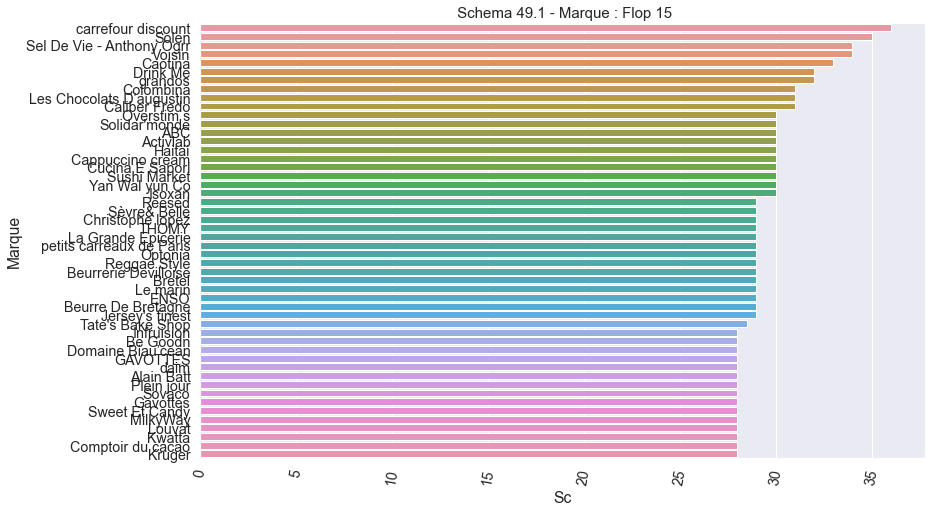

In [9]:

plt.figure(figsize=(13, 8))
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.3)
ax = sns.barplot(x="Sc", y="Marque", data=b2, orient='h', saturation=0.7)
plt.xticks(rotation=80)
plt.title(" Schema 49.1 - Marque : Flop 15", fontsize=15)

Text(0.5, 1.0, ' Schema 49.2 - Marque : Top 15')

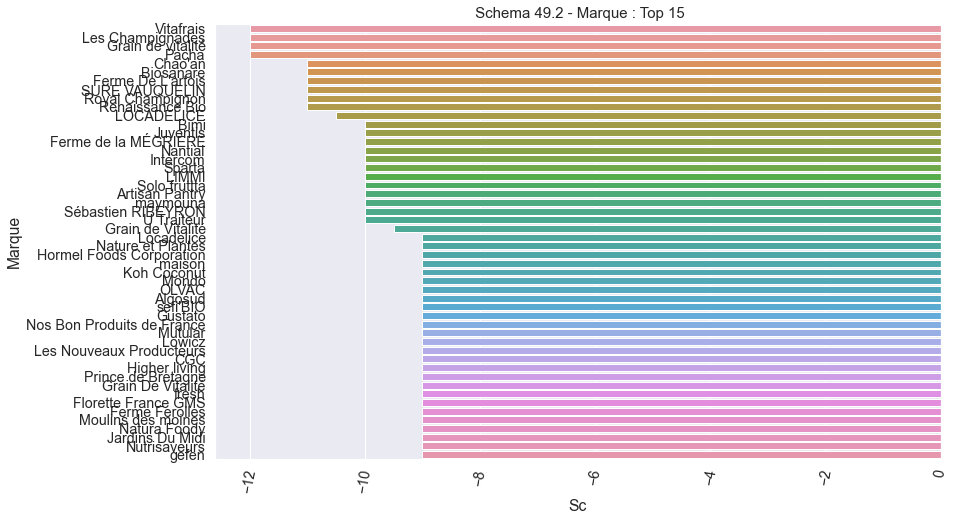

In [10]:

plt.figure(figsize=(13, 8))
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.3)
ax = sns.barplot(x="Sc", y="Marque", data=b11, orient='h', saturation=0.7)
plt.xticks(rotation=80)
plt.title(" Schema 49.2 - Marque : Top 15", fontsize=15)

In [11]:
d_04.drop('Nom_du_produit', inplace=True, axis=1)
d_04.drop('Marque', inplace=True, axis=1)
d_04.drop('Categories', inplace=True, axis=1)
d_04.drop('Sodium', inplace=True, axis=1)
d_041 = d_04.astype(float).describe()
d_041

,Code,Calorie_Kcal,Energie_J,Graisses,Graisses_saturés,Glucides,Sucres,Proteines,Sel,Score,Fibres
count,7.405400e+04,74054.000000,74054.000000,74054.000000,74054.000000,74054.000000,74054.000000,74054.000000,74054.000000,74054.000000,74054.000000
mean,7.497602e+18,277.168517,1157.627432,13.358031,4.716282,30.093113,13.167977,7.572117,0.865277,7.216214,2.901959
std,1.442700e+21,211.615891,880.120584,17.898355,8.043385,27.226316,18.032106,8.267590,2.769424,8.819110,4.536685
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000
25%,3.250390e+12,101.000000,423.000000,0.900000,0.200000,5.500000,1.100000,1.400000,0.030000,0.000000,0.000000
50%,3.375206e+12,259.000000,1084.000000,6.300000,1.500000,18.800000,4.400000,5.900000,0.400000,6.000000,1.600000
75%,3.800048e+12,410.000000,1715.000000,20.000000,6.000000,56.000000,19.000000,10.000000,1.010000,14.000000,3.700000
max,2.776134e+23,20600.000000,86200.000000,100.000000,120.000000,198.000000,100.000000,110.000000,310.000000,40.000000,100.000000


In [12]:
#--------|| Test 2 // --------



print("1----",  d_04.shape)

d_04 = d_04[d_04.Calorie_Kcal < 398]
d_04 = d_04[d_04.Calorie_Kcal > 111]

print("2----",  d_04.shape)

d_04 = d_04[d_04.Energie_J < 1665]
d_04 = d_04[d_04.Energie_J > 464]

print("3----",  d_04.shape)

d_04 = d_04[d_04.Graisses < 23]
d_04 = d_04[d_04.Graisses > 1.1]

print("4----",  d_04.shape)

d_04 = d_04[d_04.Graisses_saturés < 8.3]
d_04 = d_04[d_04.Graisses_saturés > 0.25]

print("5----",  d_04.shape)

d_04 = d_04[d_04.Glucides < 49.5]
d_04 = d_04[d_04.Glucides > 2.7]

print("6----",  d_04.shape)

d_04 = d_04[d_04.Sucres <19]
d_04 = d_04[d_04.Sucres > 0.8]

print("7----",  d_04.shape)

d_04 = d_04[d_04.Proteines < 12]
d_04 = d_04[d_04.Proteines > 1.5]

print("8----",  d_04.shape)

d_04 = d_04[d_04.Sel < 1.2]
d_04 = d_04[d_04.Sel > 0.5]

print("9----",  d_04.shape)


d_04 = d_04[d_04.Score < 16]
d_04 = d_04[d_04.Score > 2]

print("11----",  d_04.shape)

d_04 = d_04[d_04.Fibres < 3.5]
d_04 = d_04[d_04.Fibres > 0]

print("12----",  d_04.shape)

print ('mEmptyCell --- C -----', mEmptyCell(d_04))

1---- (74054, 11)
2---- (33985, 11)
3---- (33859, 11)
4---- (24910, 11)
5---- (21581, 11)
6---- (11822, 11)
7---- (9035, 11)
8---- (7005, 11)
9---- (3407, 11)
11---- (1019, 11)
12---- (796, 11)
mEmptyCell --- C ----- 0


In [13]:
d_04['Graisses_saturés'].astype('float64').corr(d_04['Graisses'].astype('float64') )

0.39141098647059264

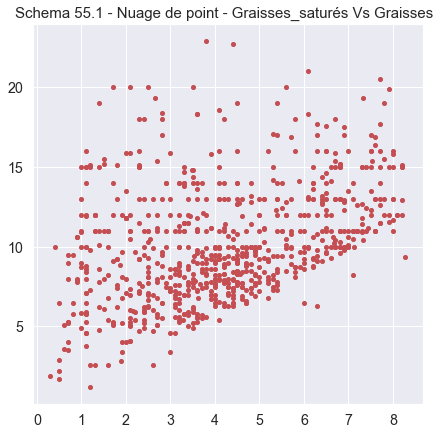

In [14]:
plt.figure(figsize=(7, 7))
plt.plot(d_04['Graisses_saturés'], d_04['Graisses'], 'ro', markersize=4)
plt.title("Schema 55.1 - Nuage de point - Graisses_saturés Vs Graisses  ",fontsize=15)
plt.show()

In [15]:
d_04['Calorie_Kcal'].astype('float64').corr(d_04['Energie_J'].astype('float64') )

0.9995762437457096

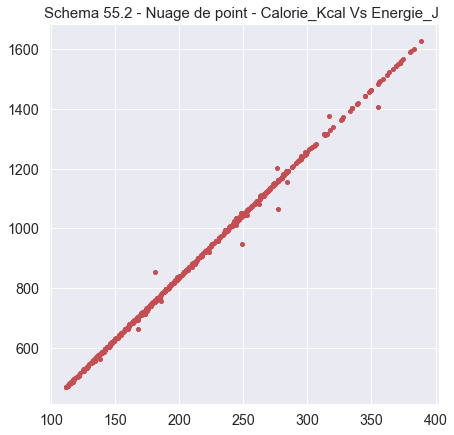

In [16]:
plt.figure(figsize=(7, 7))
plt.plot(d_04['Calorie_Kcal'], d_04['Energie_J'], 'ro', markersize=4)
plt.title("Schema 55.2 - Nuage de point - Calorie_Kcal Vs Energie_J ",fontsize=15)
plt.show()

In [17]:
d_04['Glucides'].astype('float64').corr(d_04['Sucres'].astype('float64') )

0.5545794736600413

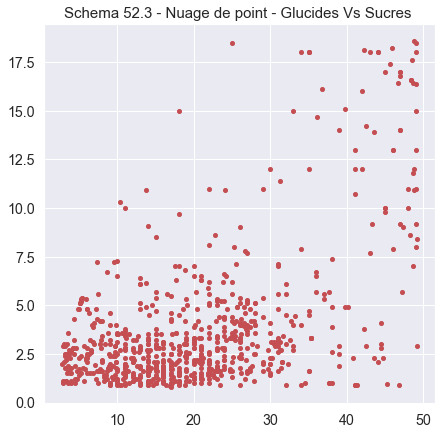

In [18]:
plt.figure(figsize=(7, 7))
plt.plot(d_04['Glucides'], d_04['Sucres'], 'ro', markersize=4)
plt.title("Schema 52.3 - Nuage de point - Glucides Vs Sucres ",fontsize=15)
plt.show()

In [19]:
d_04['Glucides'].astype('float64').corr(d_04['Energie_J'].astype('float64') )

0.7925213577398449

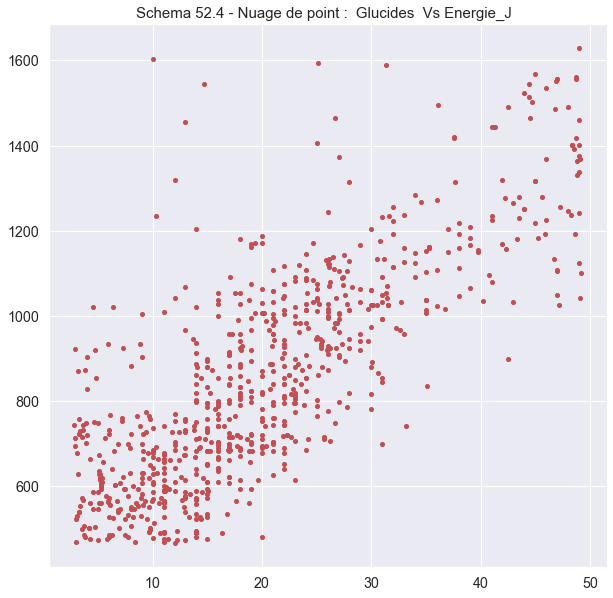

In [20]:
plt.figure(figsize=(10, 10))
plt.plot(d_04['Glucides'], d_04['Energie_J'], 'ro', markersize=4)
plt.title("Schema 52.4 - Nuage de point :  Glucides  Vs Energie_J  ",fontsize=15)
plt.show()

In [21]:
# Pearson Coefcorr = data.corr()
data_3 = pd.DataFrame(d_04)

corr = data_3.astype('float64').corr()
corr

,Code,Calorie_Kcal,Energie_J,Graisses,Graisses_saturés,Glucides,Sucres,Proteines,Sel,Score,Fibres
Code,1.000000,-0.022209,-0.022266,-0.011722,-0.003302,-0.013413,-0.022831,-0.026088,0.022204,-0.011572,-0.026483
Calorie_Kcal,-0.022209,1.000000,0.999576,0.489023,0.073676,0.790002,0.454820,0.386628,0.297461,0.490752,0.419113
Energie_J,-0.022266,0.999576,1.000000,0.486615,0.071345,0.792521,0.454024,0.385749,0.298596,0.490063,0.418880
Graisses,-0.011722,0.489023,0.486615,1.000000,0.391411,0.025676,0.033832,0.125699,0.150708,0.510086,0.192254
Graisses_saturés,-0.003302,0.073676,0.071345,0.391411,1.000000,-0.175858,-0.135699,0.315913,-0.098967,0.695279,-0.070314
Glucides,-0.013413,0.790002,0.792521,0.025676,-0.175858,1.000000,0.554579,0.277187,0.265011,0.247474,0.394405
Sucres,-0.022831,0.454820,0.454024,0.033832,-0.135699,0.554579,1.000000,0.011931,-0.048706,0.279587,0.273511
Proteines,-0.026088,0.386628,0.385749,0.125699,0.315913,0.277187,0.011931,1.000000,0.300359,0.236004,0.062851
Sel,0.022204,0.297461,0.298596,0.150708,-0.098967,0.265011,-0.048706,0.300359,1.000000,0.181741,0.245622
Score,-0.011572,0.490752,0.490063,0.510086,0.695279,0.247474,0.279587,0.236004,0.181741,1.000000,0.108135


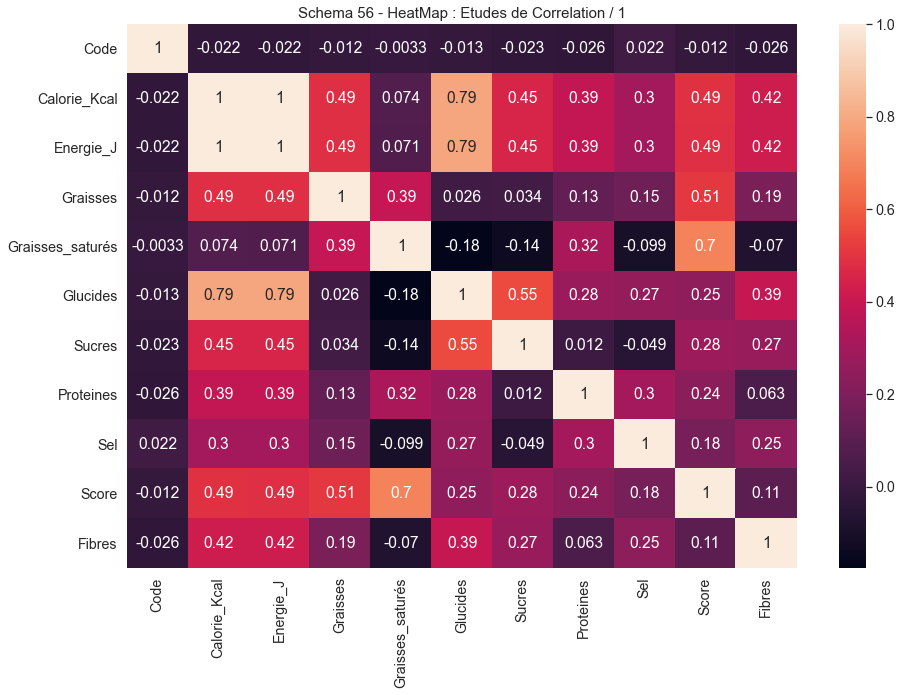

In [22]:

plt.figure(figsize=(15, 10 ))
sns.heatmap(corr, annot = True)
plt.title("Schema 56 - HeatMap : Etudes de Correlation / 1",fontsize=15)
plt.show()

Text(0.5, 1.0, 'Schema 57 - HeatMap : Etudes de Correlation / 2 ')

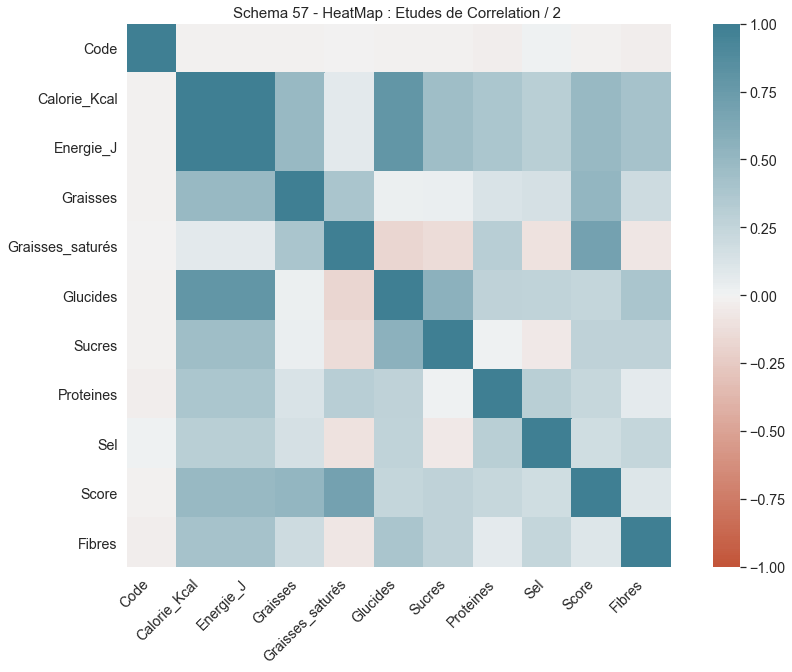

In [23]:
plt.figure(figsize=(15, 10 ))
ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(   ax.get_xticklabels(),  rotation=45, horizontalalignment='right')
plt.title("Schema 57 - HeatMap : Etudes de Correlation / 2 ",fontsize=15)



In [24]:


c_Energie_J = [
    (d_04['Energie_J'] <= 335),
    (d_04['Energie_J'] >= 335.1)  & (d_04['Energie_J'] <= 670),
    (d_04['Energie_J'] >= 670.1)  & (d_04['Energie_J'] <= 1005),
    (d_04['Energie_J'] >= 1005.1) & (d_04['Energie_J'] <= 1340),
    (d_04['Energie_J'] >= 1340.1) & (d_04['Energie_J'] <= 1675),
    (d_04['Energie_J'] >= 1675.1) & (d_04['Energie_J'] <= 2010),
    (d_04['Energie_J'] >= 2010.1) & (d_04['Energie_J'] <= 2345),
    (d_04['Energie_J'] >= 2345.1) & (d_04['Energie_J'] <= 2680),
    (d_04['Energie_J'] >= 2680.1) & (d_04['Energie_J'] <= 3015),
    (d_04['Energie_J'] >= 3015.1) & (d_04['Energie_J'] <= 3350),
    (d_04['Energie_J'] >= 3350.1) ]

v_Energie_J = [0,1,2,3,4,5,6,7,8,9,10]

d_04['Energie_J_Sc'] = np.select(c_Energie_J, v_Energie_J)


In [25]:

c_Graisses_saturés = [(d_04['Graisses_saturés'] <= 1),
    (d_04['Graisses_saturés'] >= 1.1) & (d_04['Graisses_saturés'] <= 2),
    (d_04['Graisses_saturés'] >= 2.1) & (d_04['Graisses_saturés'] <= 3),
    (d_04['Graisses_saturés'] >= 3.1) & (d_04['Graisses_saturés'] <= 4),
    (d_04['Graisses_saturés'] >= 4.1) & (d_04['Graisses_saturés'] <= 5),
    (d_04['Graisses_saturés'] >= 5.1) & (d_04['Graisses_saturés'] <= 6),
    (d_04['Graisses_saturés'] >= 6.1) & (d_04['Graisses_saturés'] <= 7),
    (d_04['Graisses_saturés'] >= 7.1) & (d_04['Graisses_saturés'] <= 8),
    (d_04['Graisses_saturés'] >= 8.1) & (d_04['Graisses_saturés'] <= 9),
    (d_04['Graisses_saturés'] >= 9.1) & (d_04['Graisses_saturés'] <= 10),
    (d_04['Graisses_saturés'] >= 10.1) ]
    

v_Graisses_saturés = [0,1,2,3,4,5,6,7,8,9,10]
d_04['Graisses_saturés_Sc'] = np.select(c_Graisses_saturés, v_Graisses_saturés)



In [26]:


c_Sucres = [
    (d_04['Sucres'] <= 4.5),
    (d_04['Sucres'] >= 4.51)  & (d_04['Sucres'] <=  9.0),
    (d_04['Sucres'] >= 9.01)  & (d_04['Sucres'] <= 13.5),
    (d_04['Sucres'] >= 13.51) & (d_04['Sucres'] <= 18),
    (d_04['Sucres'] >= 18.01) & (d_04['Sucres'] <= 22.5),
    (d_04['Sucres'] >= 22.51) & (d_04['Sucres'] <= 27),
    (d_04['Sucres'] >= 27.01) & (d_04['Sucres'] <= 31),
    (d_04['Sucres'] >= 31.01) & (d_04['Sucres'] <= 36),
    (d_04['Sucres'] >= 36.01) & (d_04['Sucres'] <= 40),
    (d_04['Sucres'] >= 40.01) & (d_04['Sucres'] <= 45),
    (d_04['Sucres'] >= 45.01) ]

v_Sucres = [0,1,2,3,4,5,6,7,8,9,10]

d_04['Sucres_Sc'] = np.select(c_Sucres, v_Sucres)


In [27]:

c_Proteines = [
    (d_04['Proteines'] <= 1.6),
    (d_04['Proteines'] >= 1.61) & (d_04['Proteines'] <= 3.2),
    (d_04['Proteines'] >= 3.21) & (d_04['Proteines'] <= 4.8),
    (d_04['Proteines'] >= 4.81) & (d_04['Proteines'] <= 6.4),
    (d_04['Proteines'] >= 6.41) & (d_04['Proteines'] <= 8.0),
    (d_04['Proteines'] >= 8.01)   ]

v_Proteines = [0,1,2,3,4,5]

d_04['Proteines_Sc'] = np.select(c_Proteines, v_Proteines)



In [28]:
d_04['Sodium_Bis'] = d_04['Sel']/2.5*1000
c_Sodium = [
    (d_04['Sodium_Bis'] <= 90),
    (d_04['Sodium_Bis'] >= 90.1)  & (d_04['Sodium_Bis'] <= 180),
    (d_04['Sodium_Bis'] >= 180.1) & (d_04['Sodium_Bis'] <= 270),
    (d_04['Sodium_Bis'] >= 270.1) & (d_04['Sodium_Bis'] <= 360),
    (d_04['Sodium_Bis'] >= 360.1) & (d_04['Sodium_Bis'] <= 450),
    (d_04['Sodium_Bis'] >= 450.1) & (d_04['Sodium_Bis'] <= 540),
    (d_04['Sodium_Bis'] >= 540.1) & (d_04['Sodium_Bis'] <= 630),
    (d_04['Sodium_Bis'] >= 630.1) & (d_04['Sodium_Bis'] <= 720),
    (d_04['Sodium_Bis'] >= 720.1) & (d_04['Sodium_Bis'] <= 810),
    (d_04['Sodium_Bis'] >= 810.1) & (d_04['Sodium_Bis'] <= 900),
    (d_04['Sodium_Bis'] >= 900.1) ]

v_Sodium = [0,1,2,3,4,5,6,7,8,9,10]
d_04['Sodium_Sc'] = np.select(c_Sodium, v_Sodium)



In [29]:

c_Graisses = [
    (d_04['Graisses'] <= 3.81),
    (d_04['Graisses'] >= 4.81)  & (d_04['Graisses'] <= 5.8),
    (d_04['Graisses'] >= 5.81) & (d_04['Graisses'] <= 6.8),
    (d_04['Graisses'] >= 6.81) & (d_04['Graisses'] <= 7.8),
    (d_04['Graisses'] >= 7.81) & (d_04['Graisses'] <= 8.8),
    (d_04['Graisses'] >= 8.81) & (d_04['Graisses'] <= 9.8),
    (d_04['Graisses'] >= 9.81) & (d_04['Graisses'] <= 10.8),
    (d_04['Graisses'] >= 10.81) & (d_04['Graisses'] <= 11.8),
    (d_04['Graisses'] >= 11.81) & (d_04['Graisses'] <= 12.8),
    (d_04['Graisses'] >= 12.81) & (d_04['Graisses'] <= 13.8),
    (d_04['Graisses'] >= 13.81) ]

v_Graisses = [0,1,2,3,4,5,6,7,8,9,10]
d_04['Graisses_Sc'] = np.select(c_Graisses, v_Graisses)



In [30]:
c_Fibres = [
    (d_04['Fibres'] <= 0.9),
    (d_04['Fibres'] >= 0.901) & (d_04['Fibres'] <= 1.9),
    (d_04['Fibres'] >= 1.901) & (d_04['Fibres'] <= 2.8),
    (d_04['Fibres'] >= 2.801) & (d_04['Fibres'] <= 3.7),
    (d_04['Fibres'] >= 3.701) & (d_04['Fibres'] <= 4.7),
    (d_04['Fibres'] >= 4.701)]

v_Fibres = [0,1,2,3,4,5]
d_04['Fibres_Sc'] = np.select(c_Fibres, v_Fibres)
d_04.pop("Total_R")

KeyError: 'Total_R'

In [ ]:
a = d_04['Energie_J_Sc']
b = d_04['Sucres_Sc'] 
c = d_04['Sodium_Sc'] 
d = d_04['Graisses_saturés_Sc']
e = d_04['Fibres_Sc'] 
f = d_04['Proteines_Sc']
g = d_04['Graisses_Sc']

d_04['score_v1'] = a + b + c + d
d_04.shape

In [ ]:
# Pearson Coefcorr = data.corr()
d_05 = pd.DataFrame(d_04)
corr = d_05.astype('float64').corr()
corr

In [ ]:
plt.figure(figsize=(15, 10 ))
ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(   ax.get_xticklabels(),  rotation=45, horizontalalignment='right')
plt.title("Schema 58 - HeatMap : Etudes de Correlation / 3 ",fontsize=15)


In [ ]:

plt.figure(figsize=(15, 10 ))
sns.heatmap(corr, annot = True)
plt.title("Schema 59 - HeatMap : Etudes de Correlation / 4 ",fontsize=15)
plt.show()

In [ ]:
#Test Sans ALL

In [ ]:
plt.figure(figsize=(6.5, 6.5))
plt.plot(d_05['score_v1'], d_05['Score'], 'ro', markersize=4)
plt.title("Schema 60 - Nuage de point : Score v1 Vs Score  ",fontsize=15)
plt.show()



In [ ]:


x0 = np.matrix(([np.ones(d_05.shape[0]), d_05['score_v1'].values])).astype(float)
y0 = np.matrix((d_05['Score'])).astype(float)

x01 = x0.T
y01 = y0.T

theta = np.linalg.inv(x01.T.dot(x01)).dot(x01.T).dot(y01)

print(theta)

In [ ]:

plt.figure(figsize=(10, 10))
plt.xlabel('score_v1')
plt.ylabel('Score')
plt.plot(d_05['score_v1'], d_05['Score'], 'ro', markersize=4)

plt.plot([0,25], [theta.item(0),theta.item(0) + 25 * theta.item(1)], linestyle='--', c='#000000')
plt.title("Schema 61 - Nuage de point : Score intermedaire Vs Score / 2  ",fontsize=15)
plt.show()


def mScore(x):
    y = theta.item(0) + theta.item(1) * x
    return y

d_05['score_def_1'] = mScore (d_05['score_v1'])

In [ ]:
Compare_Score =  d_05[["Score", "score_v1"]].astype(float)
Compare_Score.describe()

In [ ]:
Compare_Score_01 = Compare_Score.drop(Compare_Score[Compare_Score.score_v1 < 3].index)
Compare_Score_02 = Compare_Score_01.drop(Compare_Score_01[Compare_Score_01.score_v1 > 8].index)
Compare_Score_02.describe()

plt.figure(figsize=(7, 7))
boxplot_Score = Compare_Score_02.boxplot(column=['score_v1'])

plt.figure(figsize=(7, 7))
boxplot_Score = Compare_Score_02.boxplot(column=['Score'])

In [ ]:


# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
X = np.matrix([np.ones(Compare_Score.shape[0]), Compare_Score['Score'].values]).T
y = np.matrix(Compare_Score['score_v1']).T

# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta)


plt.xlabel('Score')
plt.ylabel('score_v1')

plt.plot(Compare_Score['Score'], Compare_Score['score_v1'], 'ro', markersize=4)

# On affiche la droite entre 0 et 250
plt.plot([0,25], [theta.item(0),theta.item(0) + 25 * theta.item(1)], linestyle='--', c='#000000')

plt.show()

In [ ]:
Compare_Score['Score'].astype('float64').corr(Compare_Score['score_v1'].astype('float64') )

In [ ]:
Compare_Score_V2 =  d_05[["Score", "score_v1"]].astype(float)

Compare_Score_V2_1 = Compare_Score_V2.drop(Compare_Score_V2[Compare_Score_V2.Score < 3].index)
Compare_Score_V2_2 = Compare_Score_V2_1.drop(Compare_Score_V2_1[Compare_Score_V2_1.score_v1 < 8 ].index)
Compare_Score_V2_3 = Compare_Score_V2_2.drop(Compare_Score_V2_2[Compare_Score_V2_2.Score > 9].index)
Compare_Score_V2_4 = Compare_Score_V2_3.drop(Compare_Score_V2_3[Compare_Score_V2_3.score_v1 > 11].index)
Compare_Score_V2_4



In [ ]:
Compare_Score_V2_4['Score'].astype('float64').corr(Compare_Score_V2_4['score_v1'].astype('float64') )

In [ ]:
x0 = np.matrix(([np.ones(Compare_Score_V2_4.shape[0]), Compare_Score_V2_4['score_v1'].values])).astype(float)
y0 = np.matrix((Compare_Score_V2_4['Score'])).astype(float)

x01 = x0.T
y01 = y0.T

theta = np.linalg.inv(x01.T.dot(x01)).dot(x01.T).dot(y01)
print(theta)


In [ ]:

Compare_Score_V2_4['score_v1'] = mScore (Compare_Score_V2_4['score_v1'])
d_new_score = Compare_Score_V2_4.rename(columns={'score_v1': 'New_score'}) 
d_new_score['New_score'] = round(d_new_score['New_score'])
d_new_score

In [ ]:
d_new_score['Score'].astype('float64').corr(d_new_score['New_score'].astype('float64') )

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(d_new_score['Score'], d_new_score['New_score'], markersize=4)
plt.title("Schema 52.4 - Nuage de point :  Glucides  Vs Energie_J  ",fontsize=15)
plt.show()